In [57]:
import pandas as pd

dataset = pd.read_csv('OnlineNewsPopularity.csv')

In [30]:
dataset.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


<function matplotlib.pyplot.show(*args, **kw)>

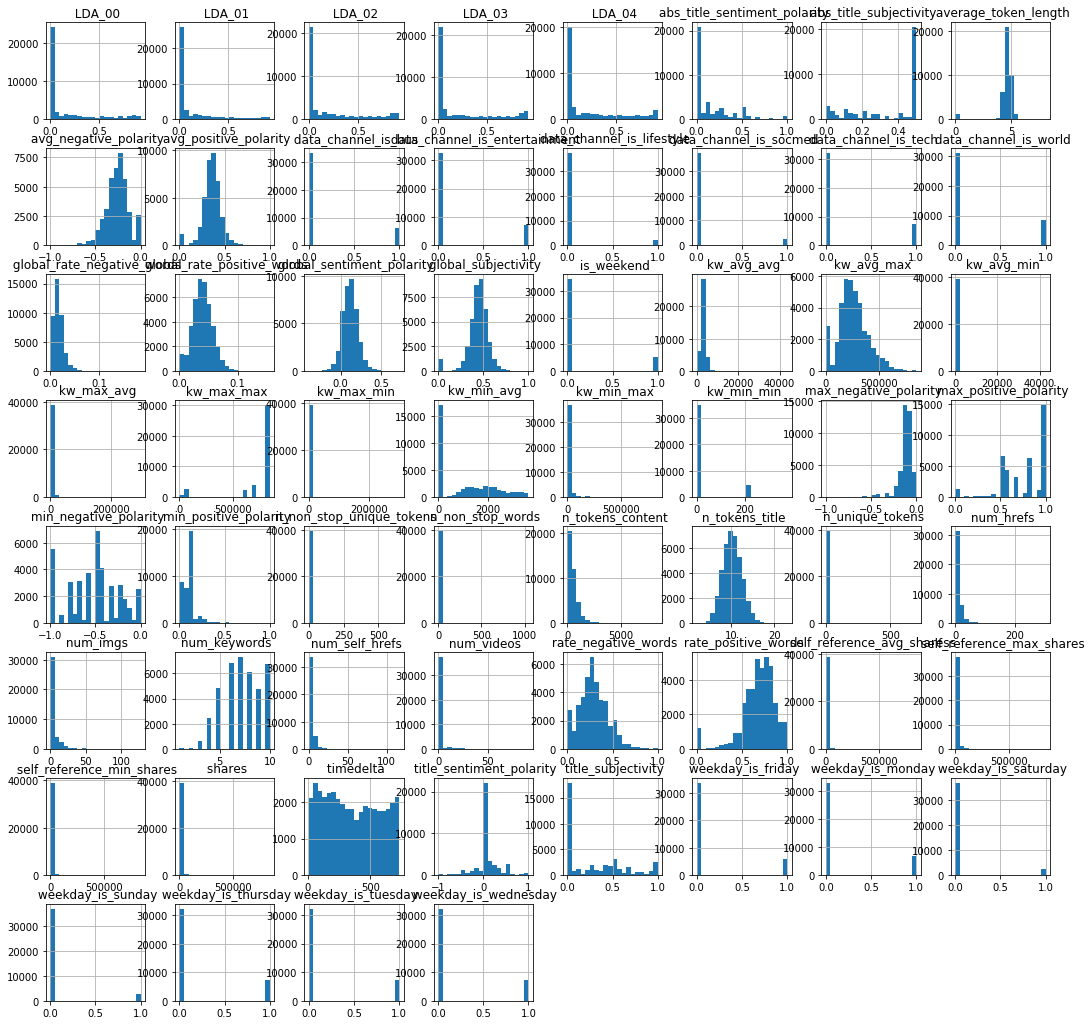

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

dataset.hist(bins = 20, figsize = (18, 18))
plt.show

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


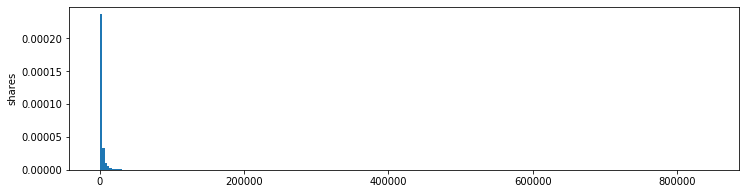

In [23]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12.0
fig_size[1] = 3.0

x = dataset[' shares']
plt.hist(x, normed=True, bins=250)
plt.ylabel('shares');

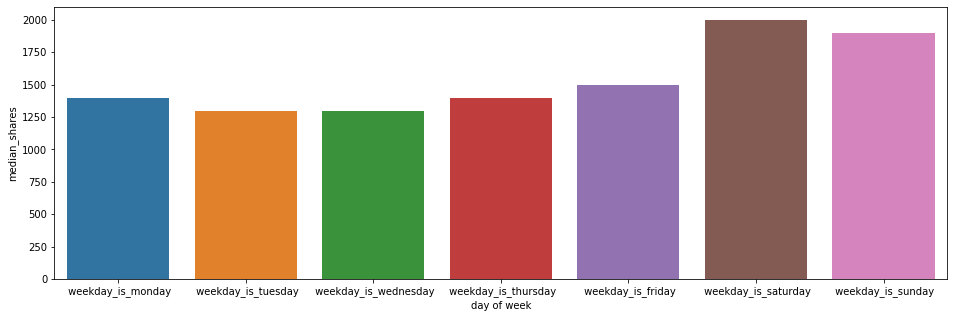

In [20]:
import seaborn as sns

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16.0
fig_size[1] = 5.0

shares = []
cols = [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday']
for d in cols:
    shares.append(dataset[dataset[d] == 1][' shares'].median())

ax = sns.barplot(x = cols, y = shares)
ax.set(xlabel = 'day of week', ylabel = 'median_shares')
plt.show()

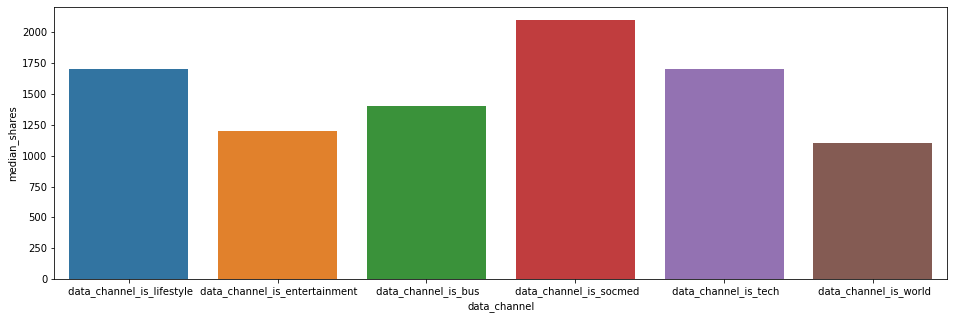

In [22]:
channel = []
cols = [' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world']
for d in cols:
    channel.append(dataset[dataset[d]==1][' shares'].median())

ax = sns.barplot(x = cols, y = channel)
ax.set(xlabel = 'data_channel', ylabel = 'median_shares')
plt.show()

In [58]:
data = dataset.iloc[:,2:-1].values
target = dataset.iloc[:,-1].values

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

train_data, test_data, train_target, test_target = train_test_split(scaled_data, target, test_size = 0.2, random_state = 1)

parameters=[{'alpha': [0.1, 0.2, 0.5, 0.9], 'max_iter' : [1e2, 1e3, 1e4, 1e5], 'random_state': [0, 1]}]
lasso = GridSearchCV(Lasso(), parameters, cv = 3)

lasso.fit(train_data, train_target)
print(lasso.best_params_)

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1128737574883.6362, tolerance: 289043102.37067735
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1473603323547.6614, tolerance: 340098415.2298041
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1313195010013.9407, tolerance: 330678562.64807177
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1128737574883.6362, tolerance: 289043102.370677

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980120177724.9869, tolerance: 330678562.64807177
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 728026594.6264648, tolerance: 289043102.37067735
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1200586103676.0957, tolerance: 340098415.2298041
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 838781291467.6458, tolerance: 330678562.64807177


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734646144.987793, tolerance: 289043102.37067735
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194312346157.70068, tolerance: 340098415.2298041
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 836292913.9638672, tolerance: 330678562.64807177
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734646144.987793, tolerance: 289043102.37067735
  

{'alpha': 0.9, 'max_iter': 100000.0, 'random_state': 0}


In [73]:
from sklearn.metrics import mean_squared_error
print("Mean squared error of a learned model: %.2f" % 
      mean_squared_error(test_target, lasso.predict(test_data)))

print("R2 score for a learned model: %.2f" % lasso.score(test_data, test_target))

Mean squared error of a learned model: 68287640.10
R2 score for a learned model: 0.03


In [74]:
for id in range(50):
    lasso_prediction = lasso.predict(test_data[id,:].reshape(1,-1))[0]

    print("Model predicted for article {0} number of shares: {1}".format(id, lasso_prediction))

    print("Real number of shares of article {0} is {1}".format(id, test_target[id]))

Model predicted for article 0 number of shares: 5484.881034127508
Real number of shares of article 0 is 5200
Model predicted for article 1 number of shares: 2006.1485032574176
Real number of shares of article 1 is 2300
Model predicted for article 2 number of shares: -1384.9292641176398
Real number of shares of article 2 is 3300
Model predicted for article 3 number of shares: 4500.599855708513
Real number of shares of article 3 is 2200
Model predicted for article 4 number of shares: 3372.037024405489
Real number of shares of article 4 is 5200
Model predicted for article 5 number of shares: 2691.664840684089
Real number of shares of article 5 is 1600
Model predicted for article 6 number of shares: 3340.2176927807814
Real number of shares of article 6 is 1800
Model predicted for article 7 number of shares: 2677.8271277410086
Real number of shares of article 7 is 624
Model predicted for article 8 number of shares: 6032.443089037821
Real number of shares of article 8 is 5300
Model predicted